In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
G = nx.Graph()

df_edges = pd.read_csv('pokemon_data/stack_network_links.csv')
df_nodes = pd.read_csv('pokemon_data/stack_network_nodes.csv')
print(df_edges.shape)
print(df_nodes.shape)

(490, 3)
(115, 3)


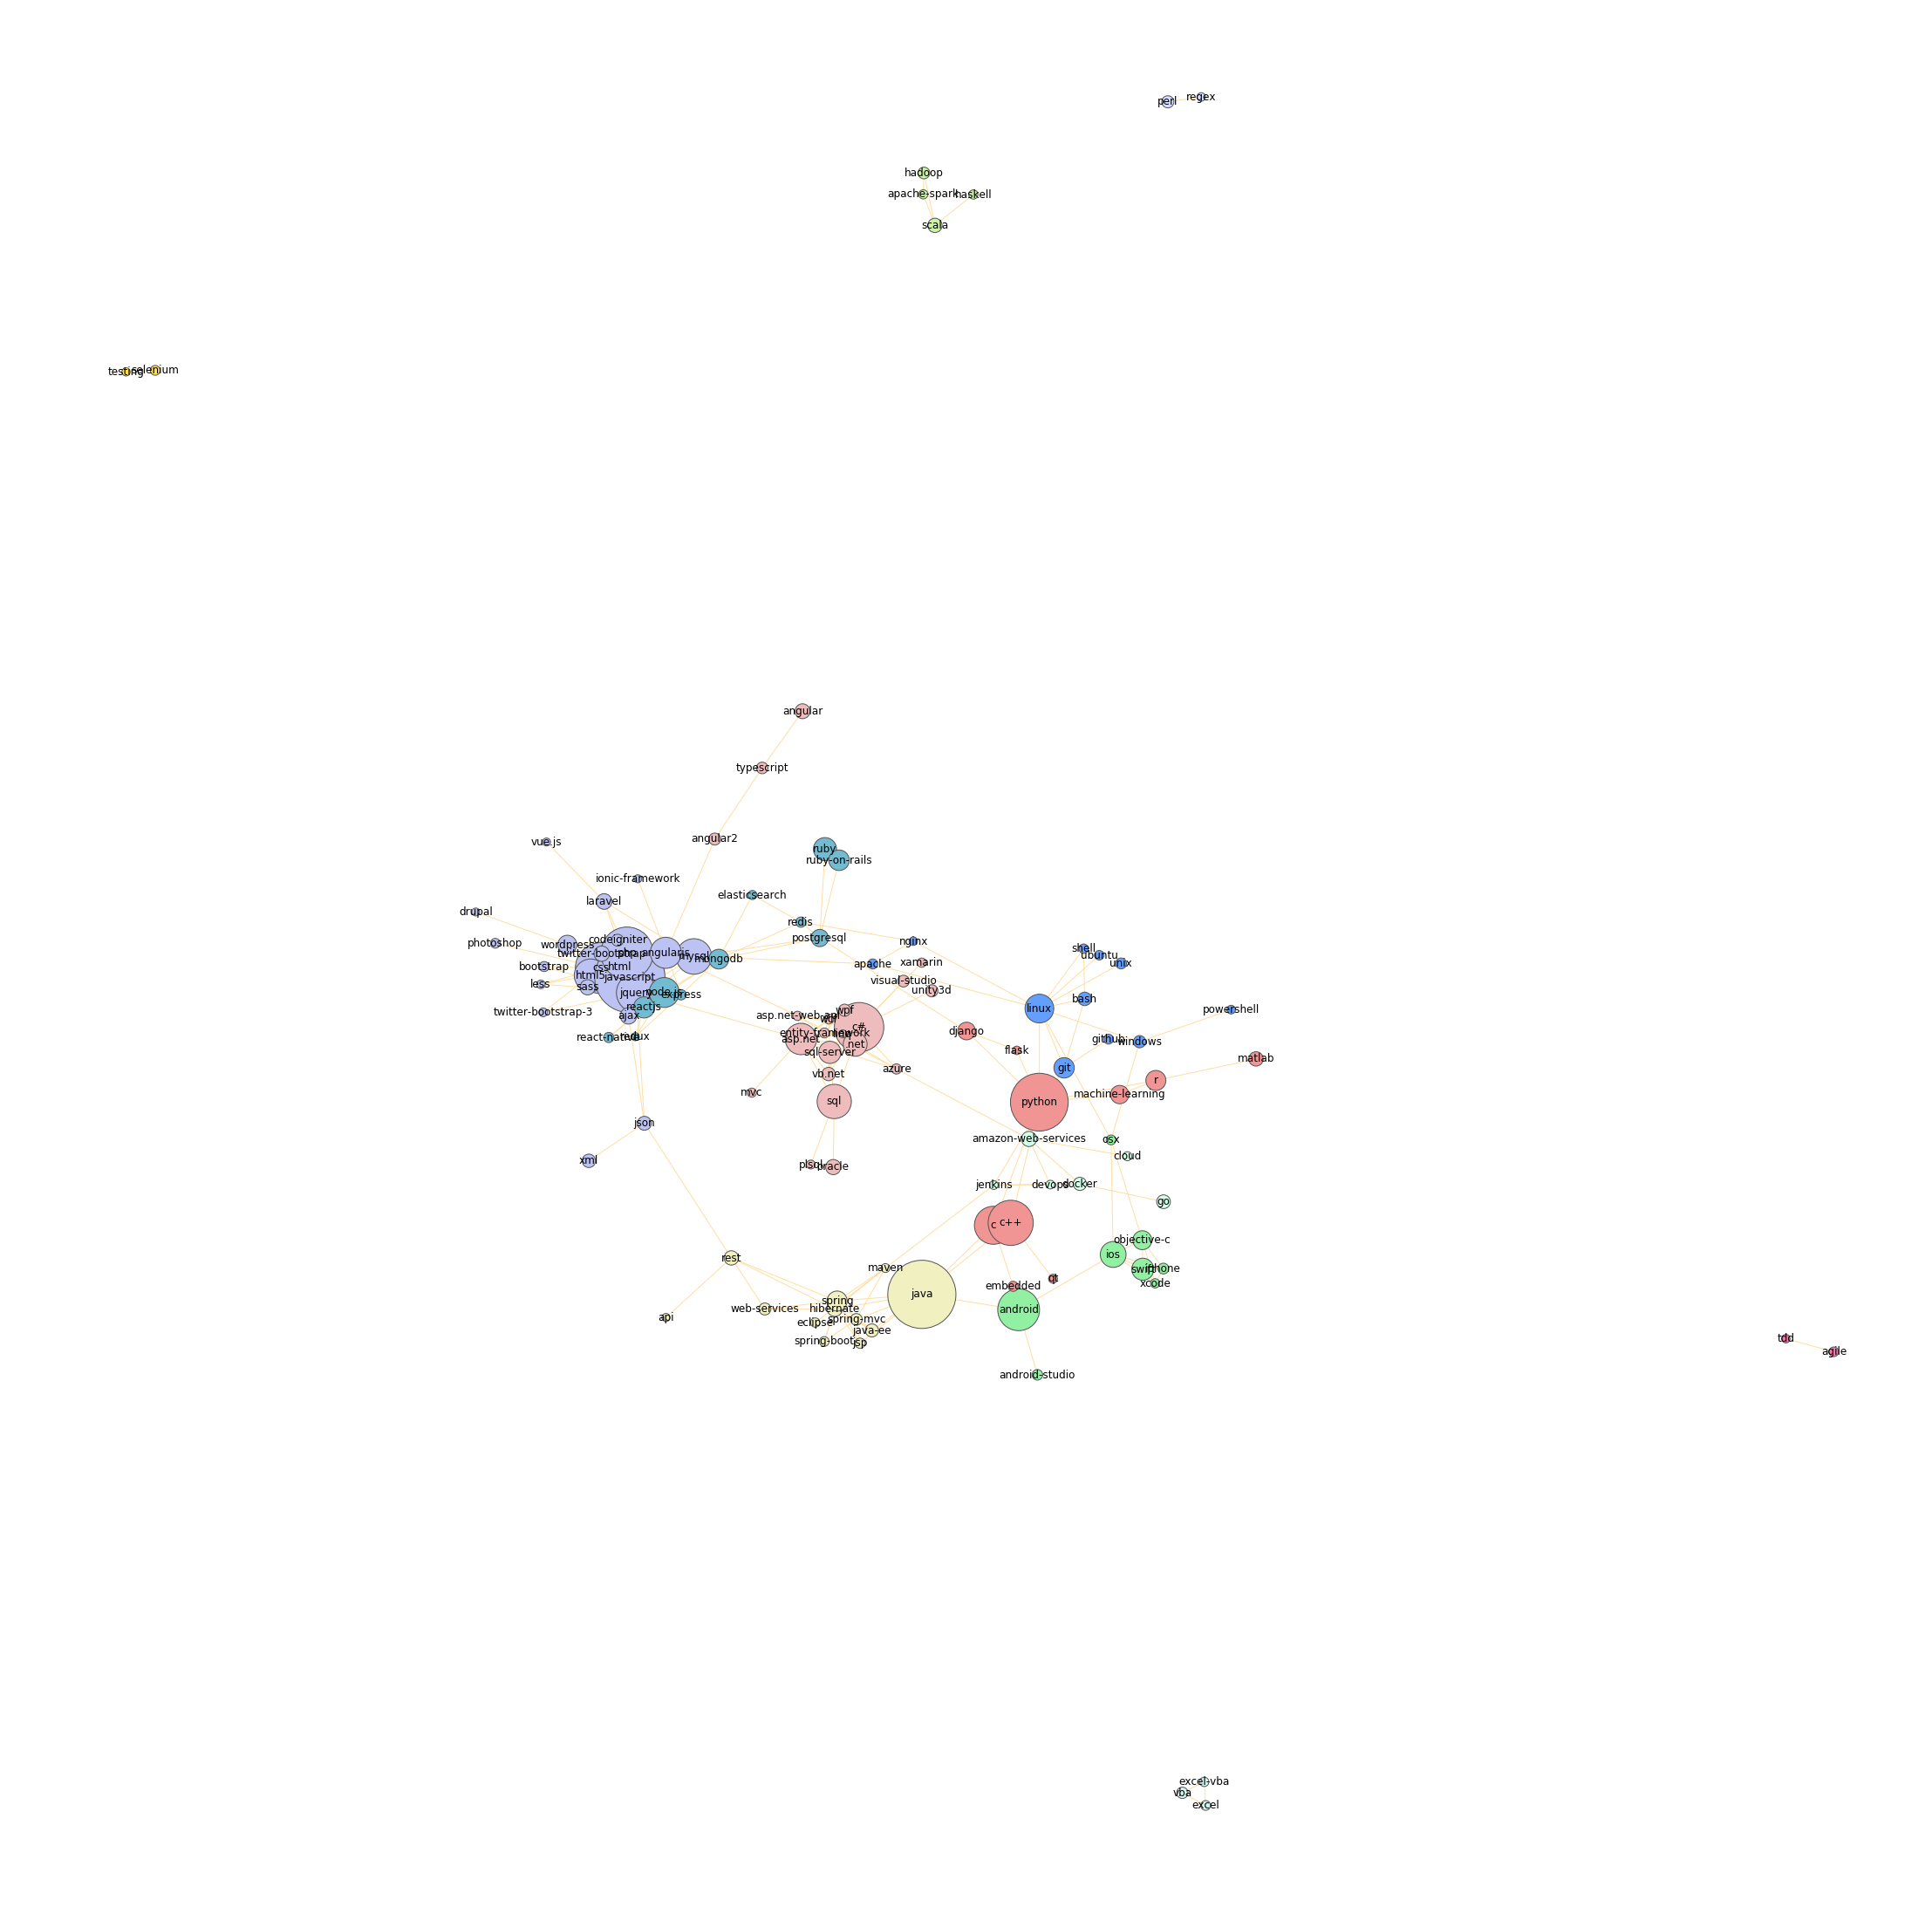

In [11]:
plt.figure(figsize=(30, 30))

options = {
    'edge_color': '#FFDEA2',
    'width' : 1,
    'with_labels' : True,
    'font_weight' : 'regular'
}

size = [G.node[node]['nodesize']*10 for node in G]

color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

colors = [color_map[G.node[node]['group']] for node in G]

for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])

nx.draw(G, node_color=colors, node_size=size, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()